# Poker Hand Classification

_Supervised Learning_

CS7641 - Machine Learning

Kamolphan Liwprasert (kliwprasert3@gatech.edu)

GTID: 903457032

Objective: To see how well each classification algorithm performs on rule inductions and compare model complexities between models

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [5]:
train_data = pd.read_csv('poker-hand-training-true.data', header=None)
train_data.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','hand']

test_data = pd.read_csv('poker-hand-testing.data', header=None)
test_data.columns = ['S1', 'C1','S2', 'C2','S3', 'C3','S4', 'C4','S5', 'C5','hand']

df = train_data
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


# Poker Hand dataset

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Poker+Hand
(Description below is from the dataset link)

**Creators:**

Robert Cattral (cattral '@' gmail.com)

Franz Oppacher (oppacher '@' scs.carleton.ca)
Carleton University, Department of Computer Science
Intelligent Systems Research Unit
1125 Colonel By Drive, Ottawa, Ontario, Canada, K1S5B6

**Data Set Information:**

Each record is an example of a hand consisting of five playing cards drawn from a standard deck of 52. Each card is described using two attributes (suit and rank), for a total of 10 predictive attributes. There is one Class attribute that describes the "Poker Hand". The order of cards is important, which is why there are 480 possible Royal Flush hands as compared to 4 (one for each suit - explained in [Web Link]).

**Attribute Information:**

1) S1 "Suit of card #1"
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

2) C1 "Rank of card #1"
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

3) S2 "Suit of card #2"
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

4) C2 "Rank of card #2"
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

5) S3 "Suit of card #3"
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

6) C3 "Rank of card #3"
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

7) S4 "Suit of card #4"
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

8) C4 "Rank of card #4"
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

9) S5 "Suit of card #5"
Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

10) C5 "Rank of card 5"
Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

11) hand CLASS "Poker Hand"
Ordinal (0-9)

- 0: Nothing in hand; not a recognized poker hand
- 1: One pair; one pair of equal ranks within five cards
- 2: Two pairs; two pairs of equal ranks within five cards
- 3: Three of a kind; three equal ranks within five cards
- 4: Straight; five cards, sequentially ranked with no gaps
- 5: Flush; five cards with the same suit
- 6: Full house; pair + different rank three of a kind
- 7: Four of a kind; four equal ranks within five cards
- 8: Straight flush; straight + flush
- 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush 

# Dimension

In [7]:
print("Train data shape: ",train_data.shape)
print("Test data shape: ",test_data.shape)

Train data shape:  (25010, 11)
Test data shape:  (1000000, 11)


# Data Quality Check

In [8]:
# check on DataFrame basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  hand    25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


no any missing value

In [9]:
# check unique value in each column
df.hand.nunique()

10

All attributes contain all possible values

In [11]:
# check duplication
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25005    False
25006    False
25007    False
25008    False
25009    False
Length: 25010, dtype: bool

# EDA

,S1
hand,
0,12493
1,10599
2,1206
3,513
4,93
5,54
6,36
7,6
8,5


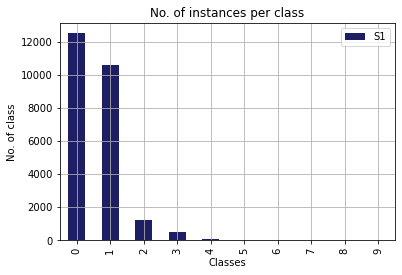

In [12]:
color = cm.CMRmap(np.linspace(0.1, 0.8, df.hand.nunique()))
ax = df.groupby('hand').count()[['S1']].plot(kind='bar', color=color)
ax.set_title("No. of instances per class")
ax.set_ylabel("No. of class")
ax.set_xlabel("Classes")
plt.grid()

df.groupby('hand').count()[['S1']]

In [13]:
df.columns

Index(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'hand'], dtype='object')

Experiment 

In [ ]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# X, y = make_classification(n_features=10, n_redundant=0, n_informative=10,
#                            random_state=1, n_clusters_per_class=1)
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)

# datasets = train_data

# figure = plt.figure(figsize=(27, 9))
# i = 1

# preprocess dataset, split into training and test part
X_train, y_train = train_data[['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']], train_data[['hand']]
X_test, y_test = test_data[['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']], test_data[['hand']]
# X = StandardScaler().fit_transform(X)
# X_train, X_test, y_train, y_test = \
#     train_test_split(X, y, test_size=.4, random_state=42)

# x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
# y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# just plot the dataset first
# cm = plt.cm.RdBu
# cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
# if ds_cnt == 0:
#     ax.set_title("Input data")
# Plot the training points
# ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#            edgecolors='k')
# Plot the testing points
# ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
#            edgecolors='k')
# ax.set_xlim(xx.min(), xx.max())
# ax.set_ylim(yy.min(), yy.max())
# ax.set_xticks(())
# ax.set_yticks(())
# i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(names, score)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
#     if hasattr(clf, "decision_function"):
#         Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     else:
#         Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
#     ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
#                edgecolors='k')
    # Plot the testing points
#     ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
#                edgecolors='k', alpha=0.6)

#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     if ds_cnt == 0:
#         ax.set_title(name)
#     ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
#             size=15, horizontalalignment='right')
#     i += 1

# plt.tight_layout()
# plt.show()

# 1 Decision Trees
with some form of pruning and describe split attributes

# 2 Neural Networks


# 3 Boosting
with much more aggressive about pruning

# 4 Support Vector Machines
with at least two kernel functions

# 5 K-Nearest Neighbors
with different values of k

# References
- https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
